# Проект "Исследовательский анализ данных"
______
## Исследование объявлений о продаже квартир
### Описание проекта
Переданы данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
### Описание данных
* `airports_nearest` — *расстояние до ближайшего аэропорта в метрах (м)*
* `balcony` — *число балконов*
* `ceiling_height` — *высота потолков (м)*
* `cityCenters_nearest` — *расстояние до центра города (м)*
* `days_exposition` — *сколько дней было размещено объявление (от публикации до снятия)*
* `first_day_exposition` — *дата публикации*
* `floor` — *этаж*
* `floors_total` — *всего этажей в доме*
* `is_apartment` — *апартаменты (булев тип)*
* `kitchen_area` — *площадь кухни в квадратных метрах (м²)*
* `last_price` — *цена на момент снятия с публикации*
* `living_area` — *жилая площадь в квадратных метрах(м²)*
* `locality_name` — *название населённого пункта*
* `open_plan` — *свободная планировка (булев тип)*
* `parks_around3000` — *число парков в радиусе 3 км*
* `parks_nearest` — *расстояние до ближайшего парка (м)*
* `ponds_around3000` — *число водоёмов в радиусе 3 км*
* `ponds_nearest` — *расстояние до ближайшего водоёма (м)*
* `rooms` — *число комнат*
* `studio` — *квартира-студия (булев тип)*
* `total_area` — *площадь квартиры в квадратных метрах (м²)*
* `total_images` — *число фотографий квартиры в объявлении*
### Структура проекта
<a href='#section1'></a>
1. [Первичный осмотр данных](#section1)
<a href='#section2'></a>
2. [Предобработка данных](#section2)  
    * Определите и изучите пропущенные значения:
    * Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;
    * Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;
    * Укажите причины, которые могли привести к пропускам в данных.
    * Приведите данные к нужным типам: поясните, в каких столбцах нужно изменить тип данных и почему.
<a href='#section3'></a>
3. [Подсчёт и добавление в таблицу новых данных:](#section3)
    * Цену квадратного метра;
    * День недели, месяц и год публикации объявления;
    * Этаж квартиры; варианты — первый, последний, другой;
    * Соотношение жилой и общей площади, а также отношение площади кухни к общей.
4. [Исследовательский анализ данных:](#section4)
    * Изучение следующих параметров: площадь, цена, число комнат, высота потолков. Построение гистограмм для каждого параметра.
    * Изучение времени продажи квартиры. Построение гистограмм. Посчёт среднего и медианы. Сколько обычно занимает продажа? Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
    * Очистка от артефактов.
    * Какие факторы больше всего влияют на стоимость квартиры? Изучение зависимости ли цены от площади, числа комнат, удалённости от центра. Изучение зависимости цены от того, на каком этаже расположена квартира: первом, последнем или другом. Изучение зависимости от даты размещения: дня недели, месяца и года.
    * Выборка 10 населённых пунктов с наибольшим числом объявлений. Посчёт средней цены квадратного метра в этих населённых пунктах. Выборка по максимальной и минимальной стоимости квартиры.
    * Изучение предложения квартир в Санкт-Петербурге с целью определения центральной зоны города.
    * Изучение центральной зоны Санкт-Петербурга: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
<a href='#section4'></a>
4. [Выводы исследования](#section5)
_____
_____

<a id='section1'></a>
## 1. Первичный осмотр данных

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymystem3 import Mystem
from collections import Counter
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Чтение данных
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19687,6,3800000.0,45.0,2018-01-05T00:00:00,2,NaN,5.0,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,17234.0,17124.0,0.0,NaN,0.0,NaN,45.0
18945,4,15800000.0,236.4,2015-02-19T00:00:00,8,NaN,6.0,176.6,6,NaN,...,22.6,0.0,Санкт-Петербург,20221.0,1802.0,3.0,571.0,3.0,441.0,921.0
2416,11,4400000.0,45.3,2017-04-17T00:00:00,2,2.50,5.0,30.5,2,False,...,6.4,1.0,Санкт-Петербург,43881.0,16385.0,0.0,NaN,0.0,NaN,59.0
6824,4,1600000.0,61.7,2015-02-28T00:00:00,3,2.50,5.0,43.0,1,NaN,...,6.0,NaN,Каменногорск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22078,20,1900000.0,55.0,2019-04-09T00:00:00,2,3.20,3.0,39.8,2,False,...,5.5,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8353,9,7000000.0,68.0,2017-04-26T00:00:00,2,3.00,17.0,41.0,2,False,...,10.2,2.0,Сестрорецк,56343.0,33272.0,0.0,NaN,1.0,545.0,285.0
2730,6,4700000.0,49.0,2018-10-12T00:00:00,1,2.70,12.0,25.0,6,NaN,...,12.0,NaN,Санкт-Петербург,18615.0,15955.0,2.0,499.0,2.0,770.0,13.0
20863,2,4720000.0,42.0,2017-04-27T00:00:00,1,NaN,25.0,18.0,14,NaN,...,10.0,1.0,Санкт-Петербург,43422.0,12179.0,0.0,NaN,0.0,NaN,158.0
2654,4,3936700.0,42.8,2018-01-02T00:00:00,1,2.75,14.0,10.0,4,NaN,...,15.9,2.0,Сестрорецк,59377.0,36307.0,1.0,88.0,2.0,140.0,16.0
13091,20,8200000.0,64.0,2016-11-24T00:00:00,2,2.75,20.0,32.5,9,False,...,12.0,5.0,Санкт-Петербург,7659.0,13841.0,0.0,NaN,0.0,NaN,194.0


In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

##### Первичные выводы:

1. В данных присутствуют пропуски и их много;
2. Плохие названия столбцов;
3. Некорректные типы данных;
4. Неудобные единицы измерений;
***
* * *

<a id='section2'></a>
## 2. Предобработка данных
    * Определите и изучите пропущенные значения:
    * Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;
    * Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;
    * Укажите причины, которые могли привести к пропускам в данных.
    * Приведите данные к нужным типам: поясните, в каких столбцах нужно изменить тип данных и почему.

In [5]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
# Переименуем столбцы для удобства и понимания.
# Расстояния переведу в км потом, вместе со сменой типов у столбцов.
columns = ['total_images',
        'last_price',
        'total_area_m2',
        'publication_date_time',
        'rooms',
        'ceiling_height_m',
        'total_floors',
        'living_area_m2',
        'floor',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'kitchen_area_m2',
        'balcony',
        'town_name',
        'dist_to_nearest_airport_km',
        'dist_to_city_center_km',
        'parks_within_3km',
        'dist_to_nearest_park_km',
        'ponds_within_3km',
        'dist_to_nearest_pond_km',
        'publication_days_duration']
df.set_axis(columns, axis="columns", inplace=True)
df.columns

Index(['total_images', 'last_price', 'total_area_m2', 'publication_date_time',
       'rooms', 'ceiling_height_m', 'total_floors', 'living_area_m2', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area_m2',
       'balcony', 'town_name', 'dist_to_nearest_airport_km',
       'dist_to_city_center_km', 'parks_within_3km', 'dist_to_nearest_park_km',
       'ponds_within_3km', 'dist_to_nearest_pond_km',
       'publication_days_duration'],
      dtype='object')

____
* `dist_to_nearest_airport_km` — *расстояние до ближайшего аэропорта в метрах (км)*
* `balcony` — *число балконов*
* `ceiling_height_m` — *высота потолков (м)*
* `dist_to_city_center_km` — *расстояние до центра города (км)*
* `publication_days_duration` — *сколько дней было размещено объявление (от публикации до снятия)*
* `publication_date_time` — *дата публикации*
* `floor` — *этаж*
* `total_floors` — *всего этажей в доме*
* `is_apartment` — *апартаменты (булев тип)*
* `kitchen_area_m2` — *площадь кухни в квадратных метрах (м²)*
* `last_price` — *цена на момент снятия с публикации*
* `living_area_m2` — *жилая площадь в квадратных метрах(м²)*
* `town_name` — *название населённого пункта*
* `is_open_plan` — *свободная планировка (булев тип)*
* `parks_within_3km` — *число парков в радиусе 3 км*
* `dist_to_nearest_park_km` — *расстояние до ближайшего парка (км)*
* `ponds_within_3km` — *число водоёмов в радиусе 3 км*
* `dist_to_nearest_pond_km` — *расстояние до ближайшего водоёма (км)*
* `rooms` — *число комнат*
* `is_studio` — *квартира-студия (булев тип)*
* `total_area_m2` — *площадь квартиры в квадратных метрах (м²)*
* `total_images` — *число фотографий квартиры в объявлении*
____

Пропусков очень много. Для начала раскидаем очевидные варианты, потому что пока Чернышевский)  
Из очевидных: 
* `is_apartment` - Заполняем False. Просто не апартаметы, вот и оставили поле пустым. 
* `balcony` - Аналогично `is_apartment`, но заполним 0. 

In [7]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['balcony'] = df['balcony'].fillna(0)
df[['is_apartment', 'balcony']].isnull().sum()

is_apartment    0
balcony         0
dtype: int64

In [8]:
# Посмотрим снова на пропуски.
(df.isnull().sum() / df.shape[0] * 100).round(2).sort_values()

total_images                   0.00
balcony                        0.00
is_open_plan                   0.00
is_apartment                   0.00
floor                          0.00
is_studio                      0.00
rooms                          0.00
publication_date_time          0.00
total_area_m2                  0.00
last_price                     0.00
town_name                      0.21
total_floors                   0.36
living_area_m2                 8.03
kitchen_area_m2                9.61
publication_days_duration     13.42
parks_within_3km              23.28
ponds_within_3km              23.28
dist_to_city_center_km        23.29
dist_to_nearest_airport_km    23.38
ceiling_height_m              38.80
dist_to_nearest_pond_km       61.56
dist_to_nearest_park_km       65.91
dtype: float64

По поводу пропусков:
1. `town_name` - неприемлимы. Одной из опор дальнейшнего анализа является местоположение объекта недвижимости. Его отсутвие критично => `dropna()`
2. `total_floors` - не мешает абсолютно пока. Значений - капля в море, в случае чего выкинем дальше по проекту. Если часть из них в тех же строках что и пункте 1 - конфетка просто!
3. `living_area_m2`, `kitchen_area_m2` - А вот тут уже неприятно. Пропусков достаточно и нам надо как-то их считать. Формат инструкций стимулирует к подсчёту отношения `kitchen_area_m2` к `total_area`. Почему бы этим не воспользоваться?)
4. `publication_days_duration` - Нас интересует зависимость параметров от скорости продажи квартиры <=> длине публикации. Нет возможности узнать дату продажи. Оставляем.
5. `Остальные` столбцы - пропусков огромнейшее количество. Обусловлено ленью пользователей ресурса - мало кому хочется пересчитать количество парков, прудов, потолков и т.д. Оставляем как есть.

**`town_name`:**

In [9]:
df = df.dropna(subset=['town_name'])
df['town_name'].isna().sum()

0

In [10]:
# Проверим сразу совпадения из-за регистров.
df['town_name'] = df['town_name'].str.lower()
df['town_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [11]:
# Вылезло несоответствие "посёлок" <---> "поселок".
print('Было:', df['town_name'].nunique())
df['town_name'] = df['town_name'].str.replace('ё', 'е', regex=True)
print('Стало:', df['town_name'].nunique())

Было: 364
Стало: 330


**`living_area_m2`, `kitchen_area_m2`:**

К сожалению или к счастью нам важны эти данные, поэтому разделим на подгруппы по $м^2$ `(bins=100)` и заполним медианными значениями.
Точно к сожалению у нас отсутвуют данные по году постройки и типу жилья, т.к. особенно во вторичке сильна типизация => закономерное распределение частей квартиры на зоны - сильно бы облегчило задачу. Придётся подручными средствами изобретать;)   
Это не панацея, поэтому могут возникнуть 2 проблемы:
1. Не попадёт в подгруппу => пропуск останется.
2. Не выполнится неравенство треугольника:), а именно после заполнения площадь жилого помещения вкупе с кухней станут больше 90% процентов квартиры. 90% - найденная оценка. Жилая площадь состоит только из спальни, гостинной и детсткой (за исключением 1-комнатных, где возможна совмещённая кухня), поэтому 10% - достаточная доля для коридоров, балконов, сан.узлов в самой бедной до санузла квартиры :D 
От этих данных тоже стоит избавимся, однако отдельно обработать студии и не студии. 

In [12]:
# Подгруппы
total_area_cut = pd.cut(df['total_area_m2'], 100)

In [13]:
# Сводная для заполнения.
area_total_pivot = df.pivot_table(
    index=total_area_cut,  
    values=['kitchen_area_m2', 'living_area_m2'],
    aggfunc = 'median'
)
area_total_pivot

,kitchen_area_m2,living_area_m2
total_area_m2,,
"(11.112, 20.88]",3.000,14.000
"(20.88, 29.76]",6.000,16.500
"(29.76, 38.64]",8.100,17.100
"(38.64, 47.52]",8.320,24.000
"(47.52, 56.4]",8.500,30.200
"(56.4, 65.28]",9.000,37.000
"(65.28, 74.16]",10.000,42.100
"(74.16, 83.04]",11.500,46.900
"(83.04, 91.92]",12.300,51.300


In [14]:
# Получим серию с медианным значением для каждой ячейки df.
kitchen_fill_series = total_area_cut.map(area_total_pivot['kitchen_area_m2'])
living_fill_series = total_area_cut.map(area_total_pivot['living_area_m2'])

In [15]:
# А заполним лишь пропуски. Fillna сделает всё за нас и вставим по индексу.
df['kitchen_area_m2'] = df['kitchen_area_m2'].fillna(kitchen_fill_series)
df['living_area_m2'] = df['living_area_m2'].fillna(living_fill_series)

In [16]:
df.isnull().sum()

total_images                      0
last_price                        0
total_area_m2                     0
publication_date_time             0
rooms                             0
ceiling_height_m               9160
total_floors                     85
living_area_m2                    2
floor                             0
is_apartment                      0
is_studio                         0
is_open_plan                      0
kitchen_area_m2                   1
balcony                           0
town_name                         0
dist_to_nearest_airport_km     5534
dist_to_city_center_km         5511
parks_within_3km               5510
dist_to_nearest_park_km       15586
ponds_within_3km               5510
dist_to_nearest_pond_km       14565
publication_days_duration      3180
dtype: int64

In [17]:
# Всего 1 пропуск в кухне и 2 в жилой площади.
df = df.dropna(subset=['kitchen_area_m2', 'living_area_m2'])
df[['kitchen_area_m2', 'living_area_m2']].isna().sum()

kitchen_area_m2    0
living_area_m2     0
dtype: int64

In [18]:
# Для студий коэффициент убрали, т.к. распределение в студии сложно предсказать => проверка только на нер-во треугольника)
query = '''
((kitchen_area_m2 + living_area_m2 > 0.9*total_area_m2) & is_studio == False) | \
((kitchen_area_m2 + living_area_m2 > total_area_m2) & is_studio == True)
'''
del_idx = df.query(query).index
df = df.drop(index=del_idx)
df.shape

(22930, 22)

Переведём все расстояния в [км] из соображений удобства. Заодно и все остальные типы поменяем.

In [19]:
mask_m_to_km = [
    'dist_to_nearest_airport_km', 
    'dist_to_city_center_km', 
    'dist_to_nearest_park_km', 
    'dist_to_nearest_pond_km'
]
df[mask_m_to_km] = df[mask_m_to_km].apply(lambda x: np.round(x / 1000))
df['balcony'] = df['balcony'].astype('int')
df['publication_date_time'] = pd.to_datetime(df['publication_date_time'], format='%Y-%m-%d')

Посмотрим дубликаты под конец.

In [20]:
df.duplicated().sum()

0

_____
_____

<a id='section3'></a>
### 3. Подсчёт и добавление в таблицу новых данных:
    * Цену квадратного метра;
    * День недели, месяц и год публикации объявления;
    * Этаж квартиры; варианты — первый, последний, другой;
    * Соотношение жилой и общей площади, а также отношение площади кухни к общей.

**`Цена квадратного метра`:**

In [21]:
df['price_per_m2'] = (df['last_price'] / df['total_area_m2']).round(4)

**`День недели, месяц и год публикации объявления`:**

In [22]:
df.head()

,total_images,last_price,total_area_m2,publication_date_time,rooms,ceiling_height_m,total_floors,living_area_m2,floor,is_apartment,...,balcony,town_name,dist_to_nearest_airport_km,dist_to_city_center_km,parks_within_3km,dist_to_nearest_park_km,ponds_within_3km,dist_to_nearest_pond_km,publication_days_duration,price_per_m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,0,санкт-петербург,19.0,16.0,1.0,0.0,2.0,1.0,NaN,120370.3704
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.60,1,False,...,2,поселок шушары,13.0,19.0,0.0,NaN,0.0,NaN,81.0,82920.7921
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,...,0,санкт-петербург,22.0,14.0,1.0,0.0,2.0,1.0,558.0,92785.7143
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,99.45,9,False,...,0,санкт-петербург,28.0,7.0,2.0,0.0,3.0,0.0,424.0,408176.1006
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,0,санкт-петербург,32.0,8.0,2.0,0.0,1.0,0.0,121.0,100000.0000


In [23]:
df['publication_day_of_week'] = df['publication_date_time'].dt.day_name()
df['publication_month'] = df['publication_date_time'].dt.month
df['publication_year'] = df['publication_date_time'].dt.year
# df = df.drop('publication_date_time', axis="columns")
df.head()

,total_images,last_price,total_area_m2,publication_date_time,rooms,ceiling_height_m,total_floors,living_area_m2,floor,is_apartment,...,dist_to_city_center_km,parks_within_3km,dist_to_nearest_park_km,ponds_within_3km,dist_to_nearest_pond_km,publication_days_duration,price_per_m2,publication_day_of_week,publication_month,publication_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,16.0,1.0,0.0,2.0,1.0,NaN,120370.3704,Thursday,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.60,1,False,...,19.0,0.0,NaN,0.0,NaN,81.0,82920.7921,Tuesday,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,...,14.0,1.0,0.0,2.0,1.0,558.0,92785.7143,Thursday,8,2015
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,99.45,9,False,...,7.0,2.0,0.0,3.0,0.0,424.0,408176.1006,Friday,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,8.0,2.0,0.0,1.0,0.0,121.0,100000.0000,Tuesday,6,2018


**`Этаж квартиры`:**

In [24]:
def floor_group(x):
    if x['floor'] == 1:
        return 'первый'
    elif x['floor'] == x['total_floors']:
        return 'последний'
    else:
        return 'другой'

In [25]:
df['floor_group'] = df.apply(floor_group, axis=1)
df.head()

,total_images,last_price,total_area_m2,publication_date_time,rooms,ceiling_height_m,total_floors,living_area_m2,floor,is_apartment,...,parks_within_3km,dist_to_nearest_park_km,ponds_within_3km,dist_to_nearest_pond_km,publication_days_duration,price_per_m2,publication_day_of_week,publication_month,publication_year,floor_group
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,0.0,2.0,1.0,NaN,120370.3704,Thursday,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.7921,Tuesday,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,...,1.0,0.0,2.0,1.0,558.0,92785.7143,Thursday,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,99.45,9,False,...,2.0,0.0,3.0,0.0,424.0,408176.1006,Friday,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,0.0,1.0,0.0,121.0,100000.0000,Tuesday,6,2018,другой


**`Соотношение жилой и общей площади, а также отношение площади кухни к общей`:**

In [26]:
df['kitchen_ratio'] = (df['kitchen_area_m2'] / df['total_area_m2']).round(4)
df['living_ratio'] = (df['living_area_m2'] / df['total_area_m2']).round(4)
df.head()

,total_images,last_price,total_area_m2,publication_date_time,rooms,ceiling_height_m,total_floors,living_area_m2,floor,is_apartment,...,ponds_within_3km,dist_to_nearest_pond_km,publication_days_duration,price_per_m2,publication_day_of_week,publication_month,publication_year,floor_group,kitchen_ratio,living_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,2.0,1.0,NaN,120370.3704,Thursday,3,2019,другой,0.2315,0.4722
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.60,1,False,...,0.0,NaN,81.0,82920.7921,Tuesday,12,2018,первый,0.2723,0.4604
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,...,2.0,1.0,558.0,92785.7143,Thursday,8,2015,другой,0.1482,0.6125
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,99.45,9,False,...,3.0,0.0,424.0,408176.1006,Friday,7,2015,другой,0.1258,0.6255
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,1.0,0.0,121.0,100000.0000,Tuesday,6,2018,другой,0.4100,0.3200


_____
_____

<a id='section4'> </a>
### 4. Исследовательский анализ данных:
    1. Изучение общих параметров: площадь, цена, число комнат, высота потолков; 
       Построение гистограмм для каждого параметра.
    2. Изучение времени продажи квартиры. Построение гистограмм. Посчёт среднего и медианы.  
    Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
    3. Очистка от артефактов.
    4. Какие факторы больше всего влияют на стоимость квартиры? 
        * Изучение зависимости цены от площади, числа комнат, удалённости от центра. 
        * Изучение зависимости цены от этажа: первый, последний или другой. 
        * Изучение зависимости от даты размещения: дня недели, месяца и года.
    5. Выборка по 10 населённым пунктам с наибольшим числом объявлений. Посчёт средней цену квадратного метра в этих населённых пунктах. Выделение среди них с самой высокой и низкой стоимостью жилья
    6. Выделение центральной зоны Санкт-Петербурга
    7. Изучение центральной зоны Санкт-Петербурга
        * Изучение общих параметров: площадь, цена, число комнат, высота потолков. 
        * Выделение факторов, влияющих на стоимость: число комнат, этаж, удалённость от центра, дата размещения объявления.Отличаются ли они от общих выводов по всему городу?

#### 1. Изучение общих параметров

In [27]:
df.columns

Index(['total_images', 'last_price', 'total_area_m2', 'publication_date_time',
       'rooms', 'ceiling_height_m', 'total_floors', 'living_area_m2', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area_m2',
       'balcony', 'town_name', 'dist_to_nearest_airport_km',
       'dist_to_city_center_km', 'parks_within_3km', 'dist_to_nearest_park_km',
       'ponds_within_3km', 'dist_to_nearest_pond_km',
       'publication_days_duration', 'price_per_m2', 'publication_day_of_week',
       'publication_month', 'publication_year', 'floor_group', 'kitchen_ratio',
       'living_ratio'],
      dtype='object')

In [28]:
filter_cols = [
    'total_area_m2',
    'last_price',
    'rooms',
    'ceiling_height_m'    
]
df1 = df[filter_cols].copy()

In [29]:
def make_plots_by_column(df, column, **kwargs):
    # Hist
    ax_hist = df.plot(
        y=column, 
        kind='hist', 
        title = 'Гистрограмма по значениям столбца \n%s'%column,
        figsize=(16, 8), 
        **kwargs
    )
    ax_hist.set_ylabel('Частота')
    ax_hist.set_xlabel('Значения')
    # Boxplot
    ax_box = df.plot(
        y=column, 
        kind='box', 
        title = 'Boxplot по значениям столбца \n%s'%column,
        figsize=(16, 8), 
    )
    ax_box.set_ylabel('Значения')

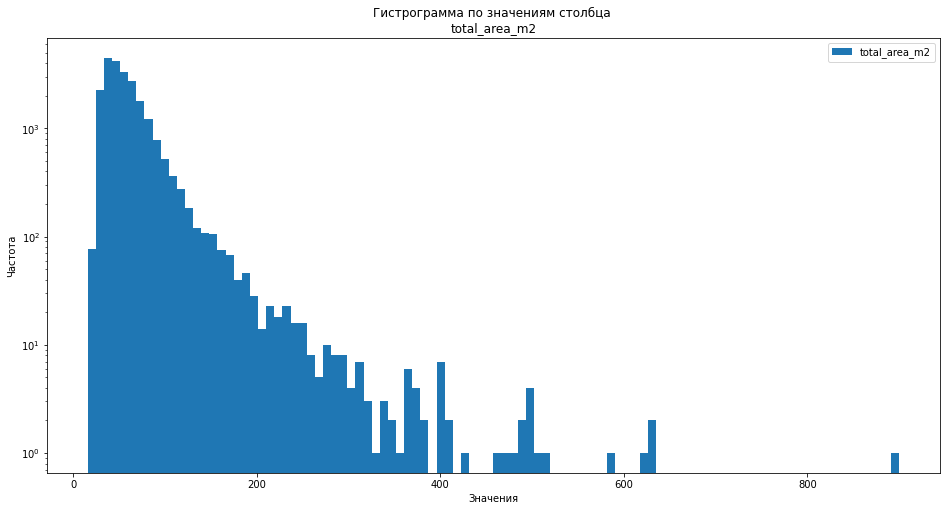

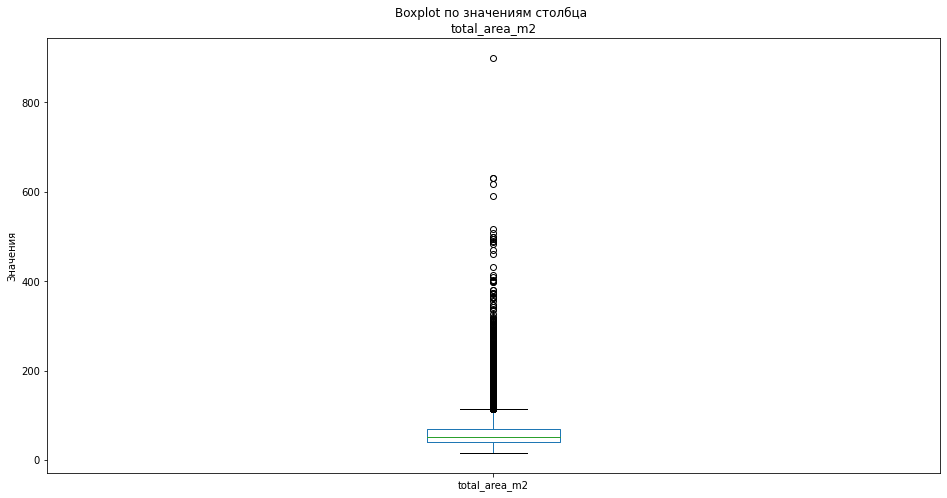

In [30]:
make_plots_by_column(df1, 'total_area_m2', logy=True, bins=100)

Огромный перекос по артефактам в области больших по площади квартир => и дорогих, и с большим числом комнат.  
Построим графики, убедимся в вышесказанном, затем посмотрим на их количество. Если их окажется немного, то произведём очистку от этих артефактов в пункте 3. 

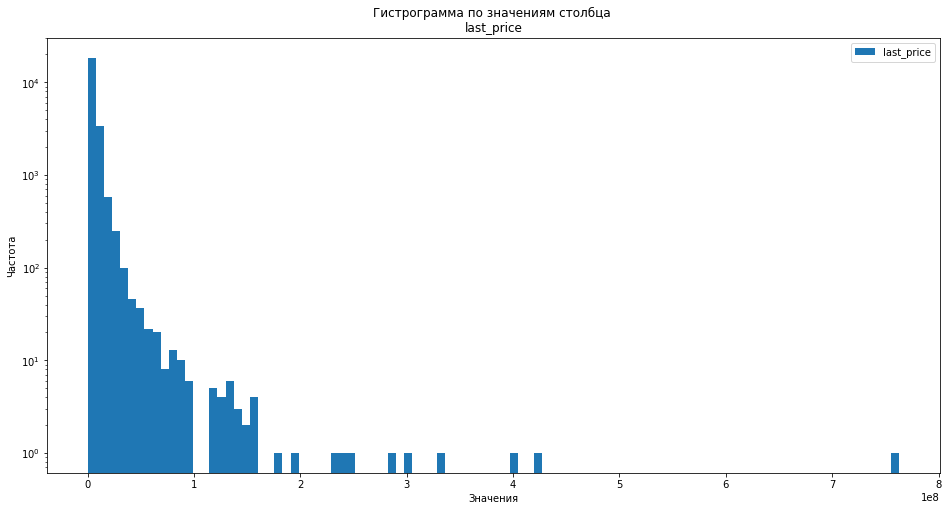

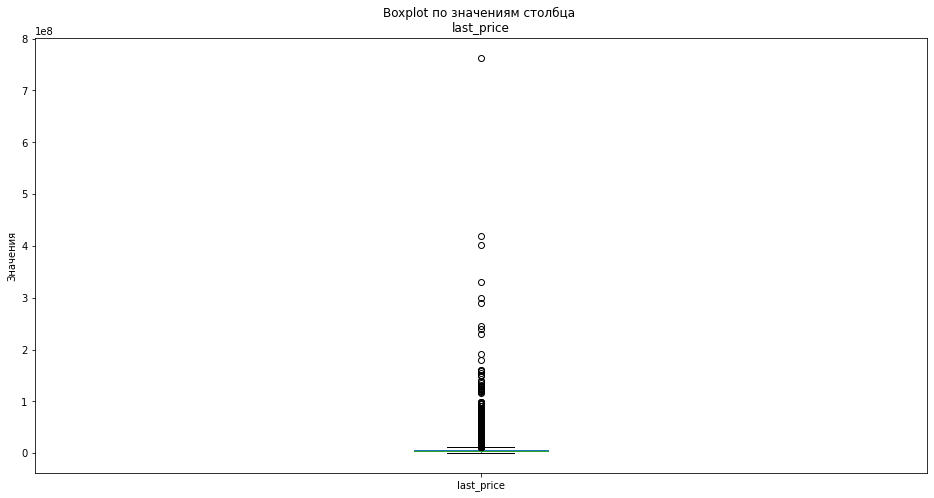

In [31]:
make_plots_by_column(df1, 'last_price', logy=True, bins=100)

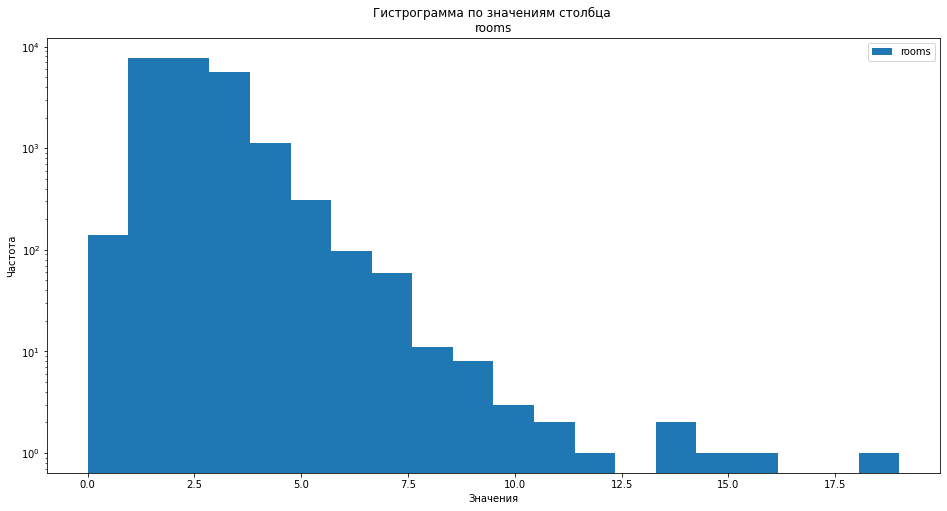

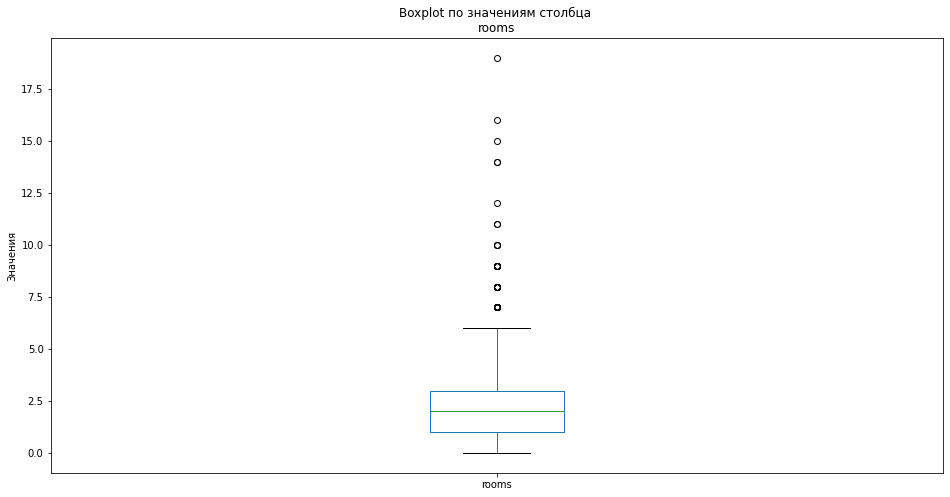

In [32]:
make_plots_by_column(df1, 'rooms', logy=True, bins=20)

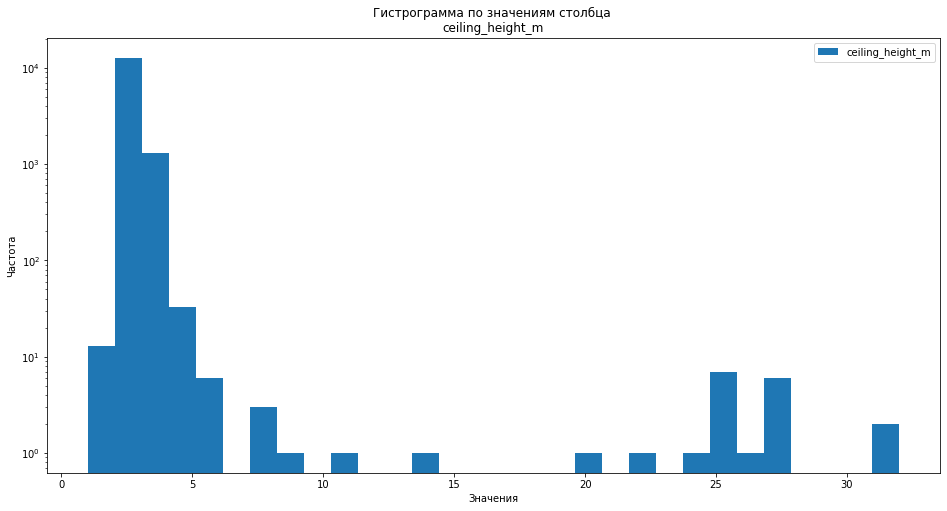

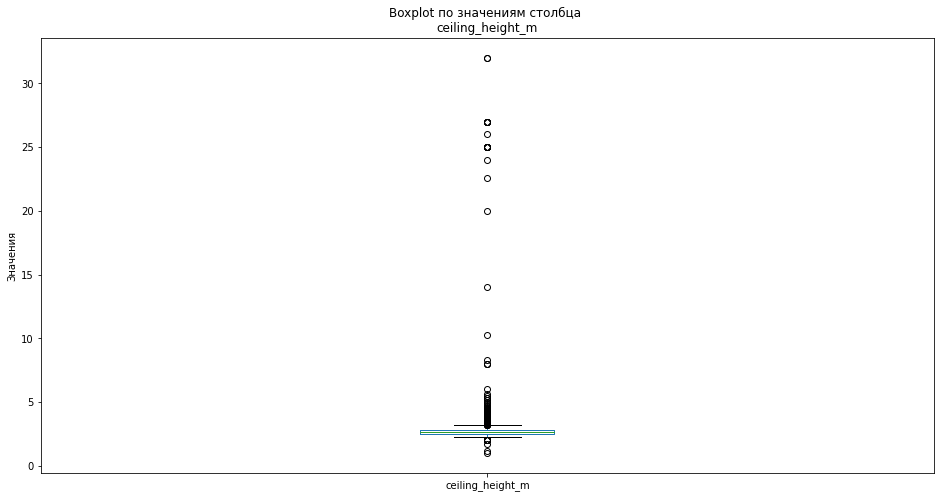

In [33]:
make_plots_by_column(df1, 'ceiling_height_m', logy=True, bins=30)

Потолки свыше 10 м?!😳  
Мы о квартирах ещё говорим?))  
Возьмём на карандаш ещё один артефакт.

#### 2. Изучение времени продажи квартиры

Посмотрим на гистограмму столбца `publication_days_duration`.

In [34]:
df2 = df[['publication_day_of_week', 'publication_days_duration']].copy()

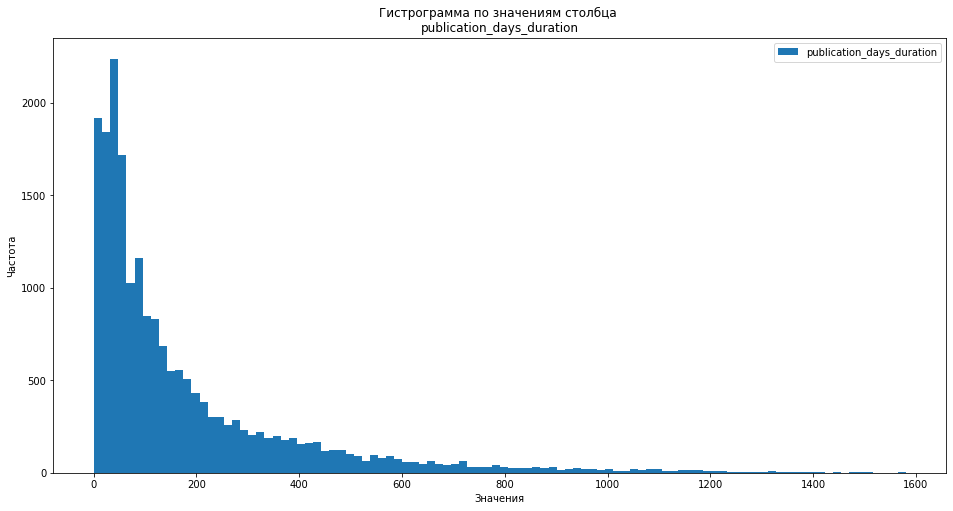

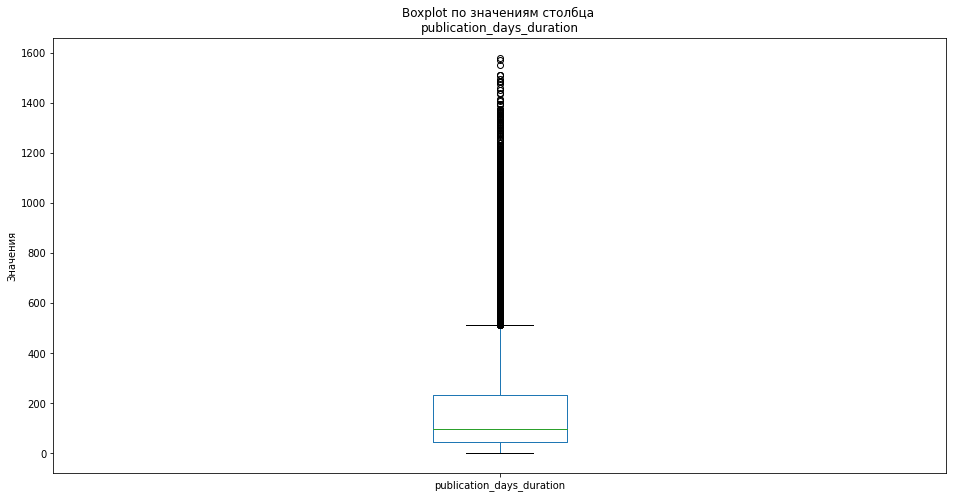

In [35]:
make_plots_by_column(df2, 'publication_days_duration', bins=100)

In [36]:
print(
    'Медианное значение времени продажи: {:.2f}'.format(df2['publication_days_duration'].median()),
    'Среднее значение времени продажи: {:.2f}'.format(df2['publication_days_duration'].mean()),
    'Квантили 0.25 и 0.75: {:.2f}, {:.2f}'.format(
        df2['publication_days_duration'].quantile(0.75),
        df2['publication_days_duration'].quantile(0.25)
                                                 ),
    sep='\n'
)

Медианное значение времени продажи: 96.00
Среднее значение времени продажи: 181.58
Квантили 0.25 и 0.75: 232.00, 45.00


Ух ты! Различие аж в 2 раза между средним и медианным!!   
Перейдём с очистке артефактов, а потом повторим пункты 1, 2.

#### 3. Очистка от артефактов

Артефакты из двух предыдущих пунктов:
* Выбросы за значениями площадей свыше 200 м^2;
* Квартиры стоимостью выше 3.000.000 рублей;
* Потолки выше 5 м;
* Объявления дольше 600 дней.

Почти все смущающие артефакты находятся в областях высоких значений. Попробуем автоматизировать процесс очистки.

In [37]:
def drop_artefacts(df, column):
    quantile_1 = df[column].quantile(0.25)                 
    quantile_3 = df[column].quantile(0.75)
    diff = quantile_3 - quantile_1
    filter_value = (df[column] >= (quantile_1 - 1.5 * diff)) & (df[column] <= (quantile_3 + 1.5 * diff))
    return df[filter_value]

**Выезжаем за артефактами 🚓**

In [38]:
filter_cols.append('publication_days_duration')
df3 = df[filter_cols]

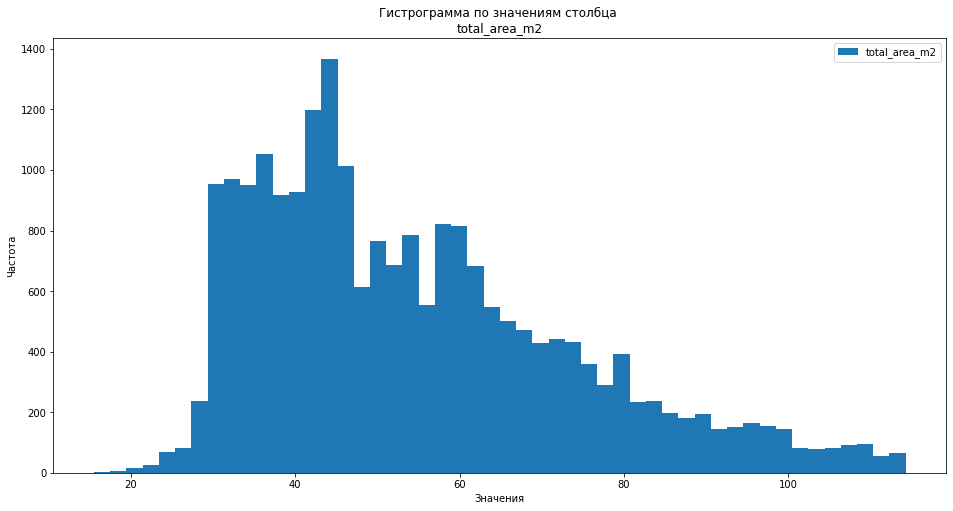

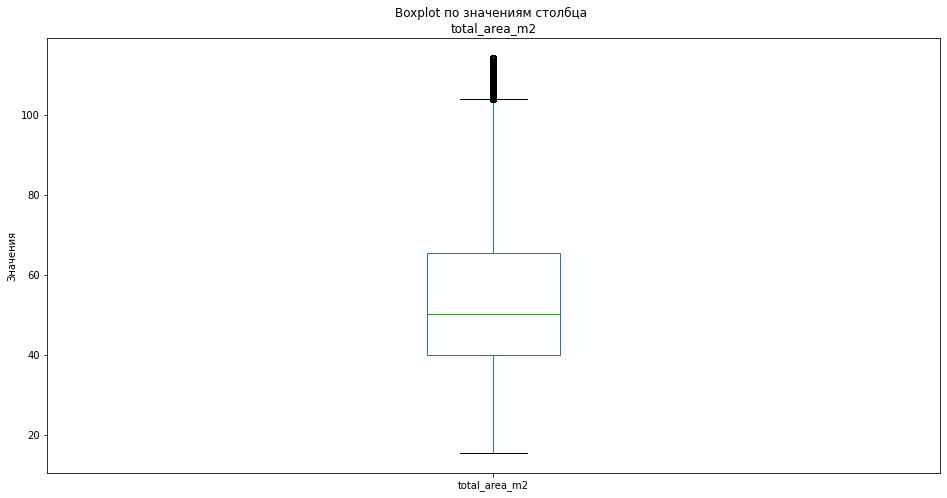

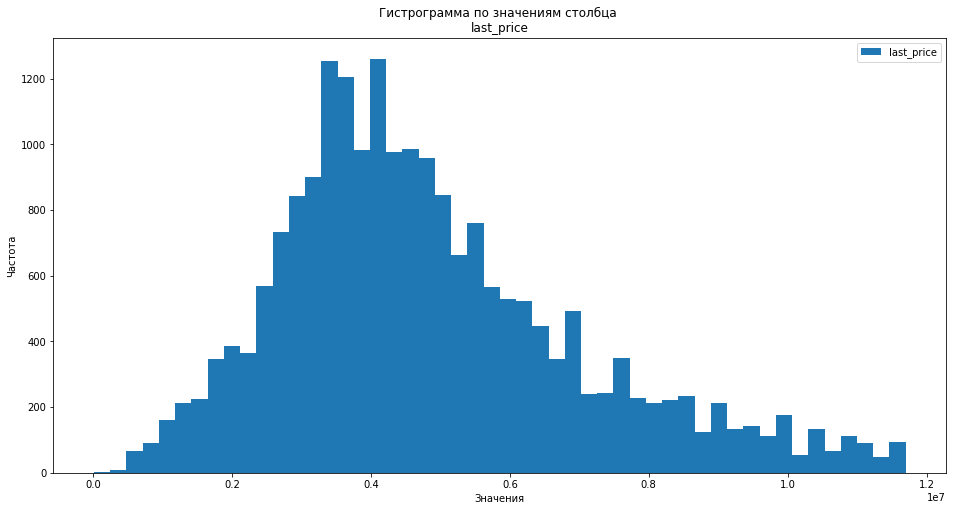

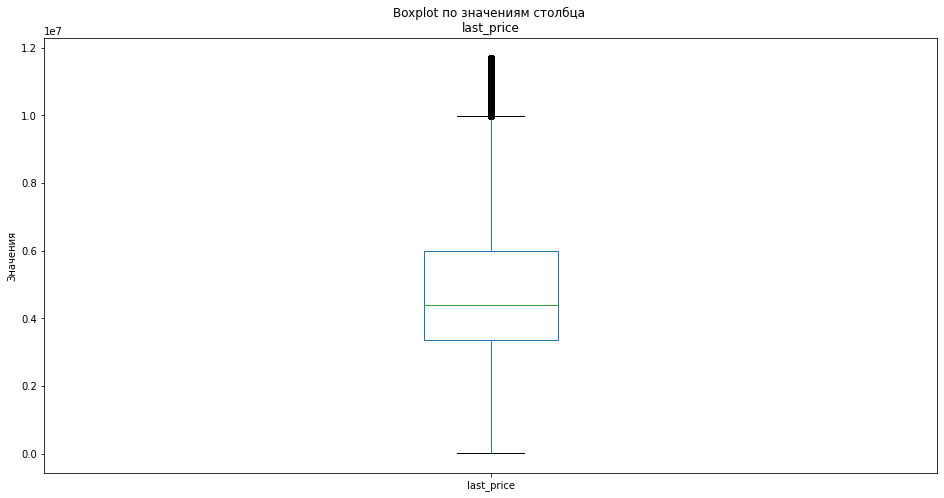

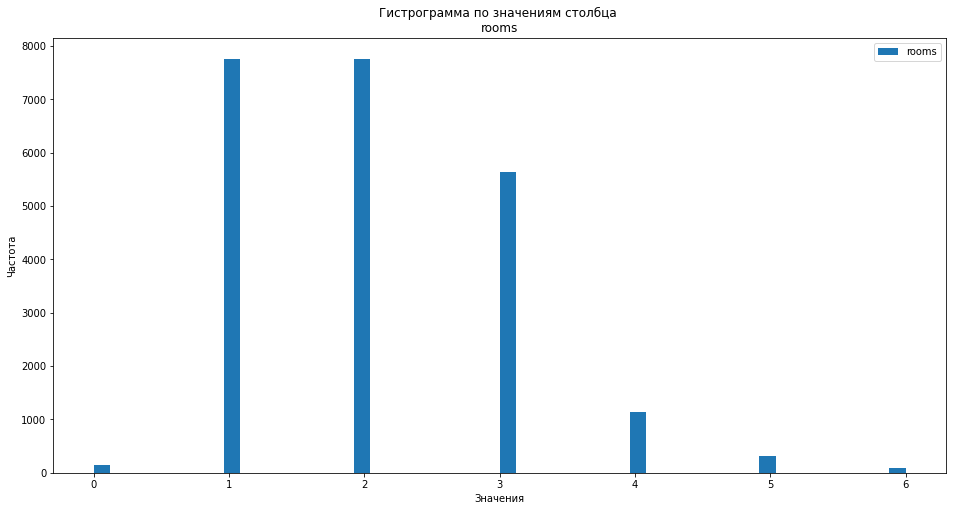

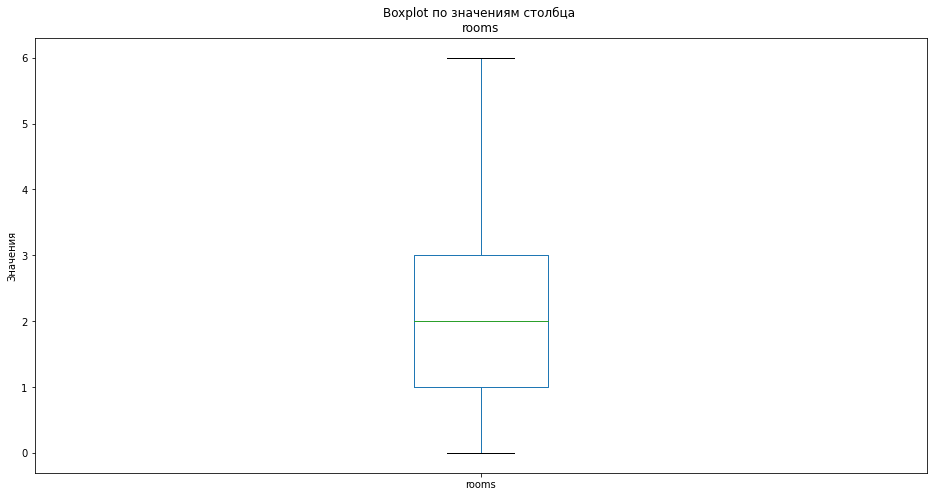

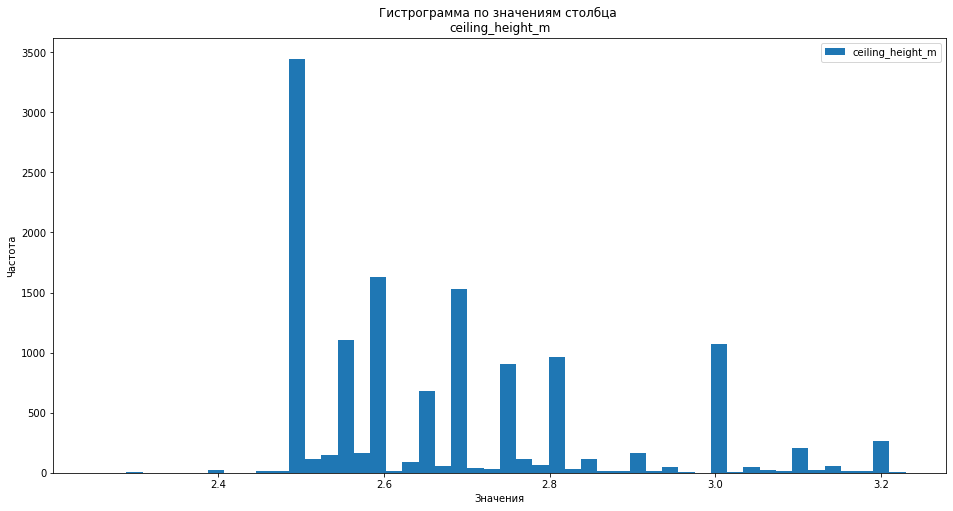

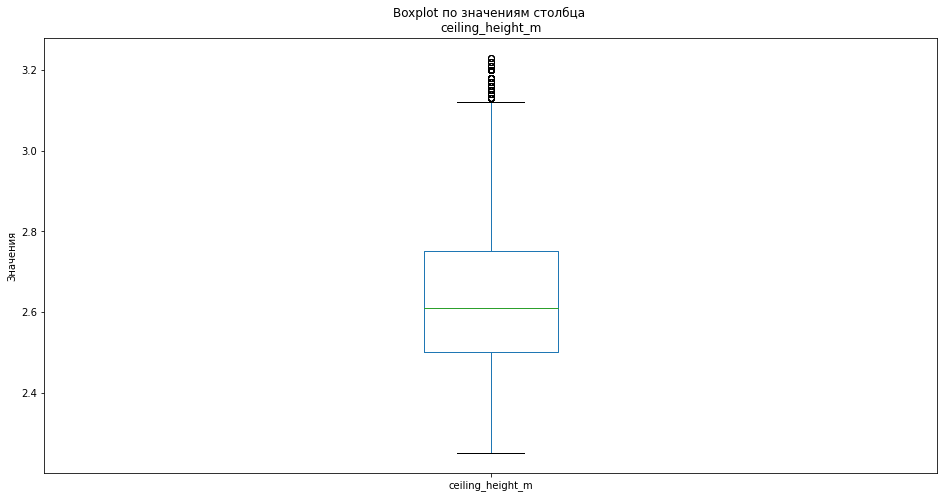

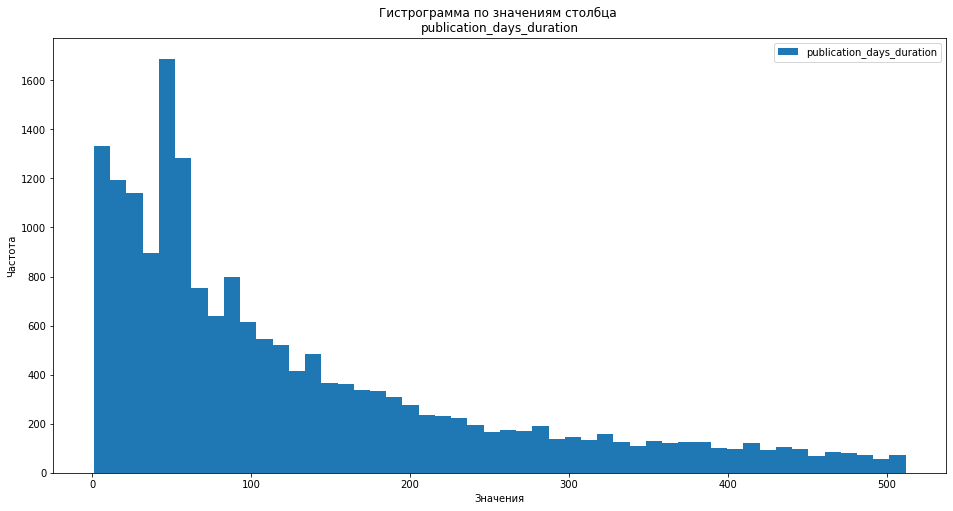

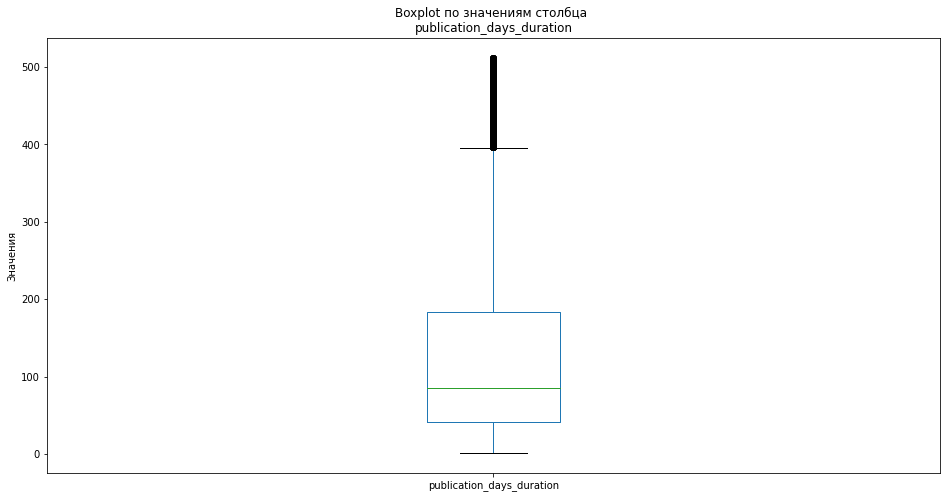

In [39]:
pivot = list()
for col in filter_cols:
    good_df = drop_artefacts(df3, column=col)
    make_plots_by_column(good_df, column=col, bins=50)
    pivot.append([
        col, 
        good_df[col].median().round(4),
        good_df[col].mean().round(4),
        good_df[col].quantile(0.25).round(4),
        good_df[col].quantile(0.75).round(4)
    ])

In [40]:
pivot_columns = ['Column_name', 'Median', 'Mean', 'Quantile_1', 'Quantile_3']
pivot_df = pd.DataFrame(pivot, columns=pivot_columns)
pivot_df

,Column_name,Median,Mean,Quantile_1,Quantile_3
0,total_area_m2,50.30,5.451710e+01,40.0,65.60
1,last_price,4400000.00,4.841385e+06,3350000.0,5999000.00
2,rooms,2.00,2.051900e+00,1.0,3.00
3,ceiling_height_m,2.61,2.678600e+00,2.5,2.75
4,publication_days_duration,85.00,1.290098e+02,41.0,183.00


**Выводы по пункту 2 после очистки:**
1. Медианным значением для продажи квартир является 3 месяца (85 дней);
2. Можно считать, что квартира продаётся быстро, если продана быстрее 1,5 месяцев (41 день);
3. Можно считать, что квартира плохо продаётся, если продана дольше чем за 6 месяцев (183 день);

#### 4. Какие факторы больше всего влияют на стоимость квартиры?

* Какие факторы больше всего влияют на стоимость квартиры? 
* Изучение зависимости ли цены от площади, числа комнат, удалённости от центра. 
* Изучение зависимости цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
* Изучение зависимости от даты размещения: дня недели, месяца и года.

In [41]:
df.columns

Index(['total_images', 'last_price', 'total_area_m2', 'publication_date_time',
       'rooms', 'ceiling_height_m', 'total_floors', 'living_area_m2', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area_m2',
       'balcony', 'town_name', 'dist_to_nearest_airport_km',
       'dist_to_city_center_km', 'parks_within_3km', 'dist_to_nearest_park_km',
       'ponds_within_3km', 'dist_to_nearest_pond_km',
       'publication_days_duration', 'price_per_m2', 'publication_day_of_week',
       'publication_month', 'publication_year', 'floor_group', 'kitchen_ratio',
       'living_ratio'],
      dtype='object')

In [42]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=1) \
    .set_properties(**{'max-width': '100px', 'font-size': '9pt'})

,total_images,last_price,total_area_m2,rooms,ceiling_height_m,total_floors,living_area_m2,floor,is_apartment,is_studio,is_open_plan,kitchen_area_m2,balcony,dist_to_nearest_airport_km,dist_to_city_center_km,parks_within_3km,dist_to_nearest_park_km,ponds_within_3km,dist_to_nearest_pond_km,publication_days_duration,price_per_m2,publication_month,publication_year,kitchen_ratio,living_ratio
total_images,1,0.102547,0.111061,0.0952171,0.00515633,0.0135737,0.0957937,0.0337016,0.0124019,-0.0321137,-0.014841,0.108869,0.0468559,-0.00482893,-0.047917,0.0199701,0.00801799,-0.0124744,0.00666541,-0.0313725,0.134771,0.00603857,0.143737,-0.0302788,0.00390851
last_price,0.102547,1,0.652456,0.360472,0.113313,-0.00239563,0.583412,0.0290534,0.0206712,-0.0233607,0.00137262,0.491862,0.0100176,-0.027677,-0.204799,0.144696,-0.00681886,0.158578,-0.0706575,0.0790803,0.738589,0.00137213,-0.042144,-0.107111,0.00909833
total_area_m2,0.111061,0.652456,1,0.760828,0.143648,-0.0673438,0.94866,-0.0203422,0.0297027,-0.0679589,-0.011549,0.631413,0.0119799,-0.0350588,-0.233248,0.160157,-0.0211661,0.163357,-0.0743834,0.146357,0.30561,0.0042676,-0.0794725,-0.352244,0.165004
rooms,0.0952171,0.360472,0.760828,1,0.0896661,-0.220693,0.832726,-0.146568,0.000644568,-0.138268,-0.0501602,0.298901,-0.0123609,-0.063827,-0.185557,0.130909,-0.0429102,0.0929905,-0.0317745,0.12279,0.0549297,-0.00324366,-0.054109,-0.61358,0.517212
ceiling_height_m,0.00515633,0.113313,0.143648,0.0896661,1,-0.0387234,0.137211,-0.0239314,0.0849271,-0.000422567,0.00318364,0.117557,0.00588189,-0.0443324,-0.128751,0.0943591,-0.0259017,0.094208,-0.0468057,0.0375583,0.0970461,-0.00189489,-0.022083,-0.0165386,0.00222237
total_floors,0.0135737,-0.00239563,-0.0673438,-0.220693,-0.0387234,1,-0.154146,0.676002,-0.0232743,0.069595,0.0227472,0.159961,0.171215,0.11049,0.0119998,-0.24923,0.0892986,-0.121521,0.0176324,-0.0512733,0.15221,0.0168044,0.010156,0.350151,-0.382409
living_area_m2,0.0957937,0.583412,0.94866,0.832726,0.137211,-0.154146,1,-0.0878638,0.0285919,-0.0544988,-0.00619761,0.457569,-0.00980019,-0.0547113,-0.228778,0.171527,-0.0409638,0.14858,-0.056847,0.14048,0.230891,-0.00233297,-0.0712843,-0.50728,0.418899
floor,0.0337016,0.0290534,-0.0203422,-0.146568,-0.0239314,0.676002,-0.0878638,1,-0.0108335,0.0393366,0.0187226,0.130805,0.166594,0.0743801,0.00386681,-0.161713,0.0584639,-0.0754002,0.0077747,-0.0384717,0.130592,0.0197258,0.0079976,0.241361,-0.277316
is_apartment,0.0124019,0.0206712,0.0297027,0.000644568,0.0849271,-0.0232743,0.0285919,-0.0108335,1,-0.00324625,-0.0016133,0.0289212,0.0331627,0.0149803,0.0078345,0.0177942,-0.0194822,0.0167672,0.0127858,0.0174787,0.0269478,0.00472506,0.00842304,0.00283354,-0.000599004
is_studio,-0.0321137,-0.0233607,-0.0679589,-0.138268,-0.000422567,0.069595,-0.0544988,0.0393366,-0.00324625,1,-0.00272403,-0.0551667,0.0258915,-0.0169301,-0.00514288,-0.0299977,0.0174772,-0.000891194,-0.00201125,-0.0173577,0.0145845,0.00193806,0.0107858,0.0463056,0.0679951


На стоимость квартиры больше всего влияют:
* Цена за квадратный метр
* Площадь квартиры
* Размер жилой и кухонной зоны
* Количество комнат

Выводы весьма предсказуемые и очевидные. Продолжаем исследование)

In [43]:
good_prices = drop_artefacts(df, column='last_price')

In [44]:
def get_boxes_by_price(df, column):
    good_prices \
        .boxplot(
            column='last_price', 
            by=column, 
            figsize = (16, 8)
        ) \
        .set_ylabel('last_price');

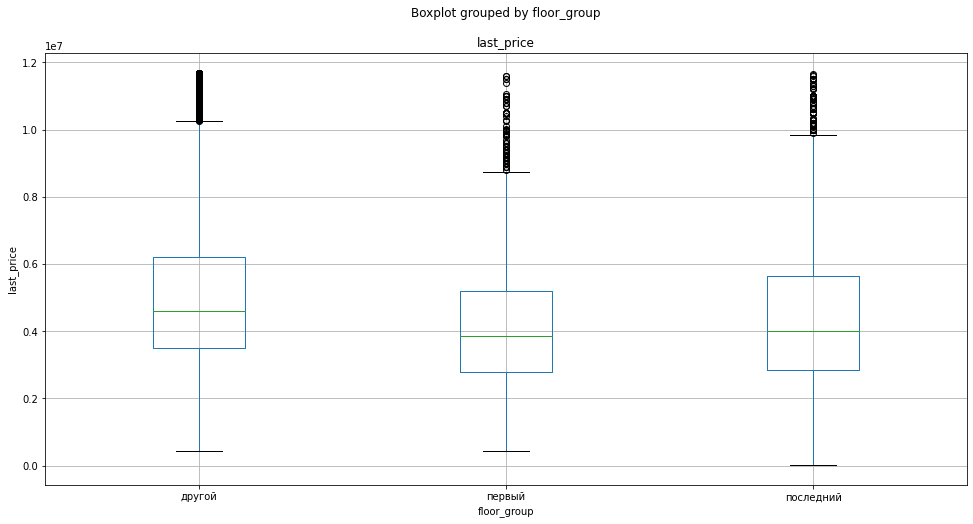

In [45]:
get_boxes_by_price(good_df, column='floor_group')

**Выводы по зависимости цены от категории этажа:**  
* Цены на первые и последние этажи ниже, чем на других этажах;
* Самые низкие цены на квартире 1-ого этажа;   

И снова весьма предсказуемо. Продолжаем)

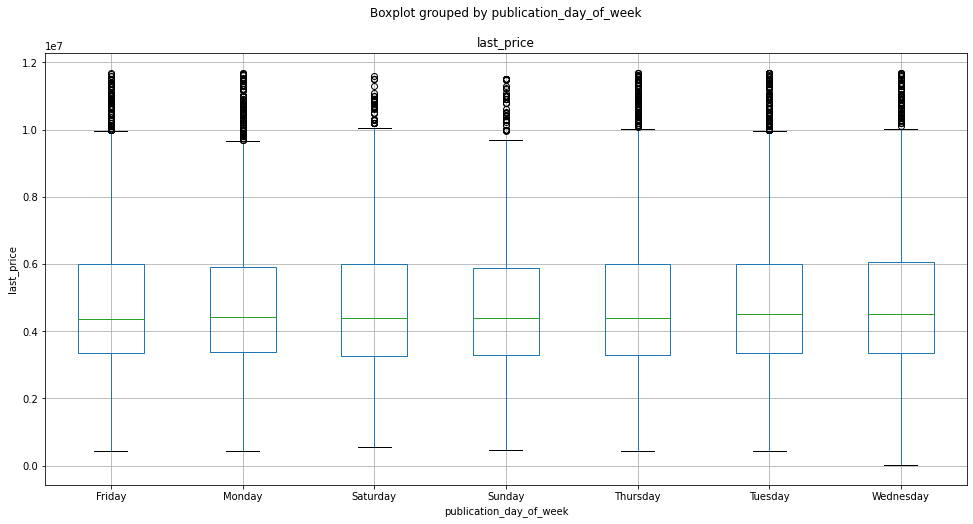

In [46]:
get_boxes_by_price(good_df, column='publication_day_of_week')

Очень ровно лежат коробки. Зависимостью даже не пахнет:)

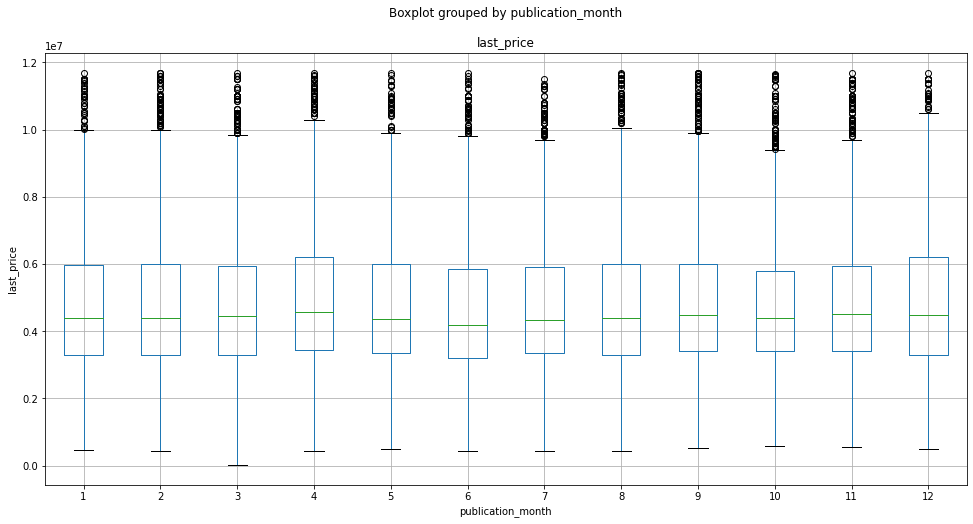

In [47]:
get_boxes_by_price(good_df, column='publication_month')

Аналогично дню недели. Может хоть год порадует зависимостью?)

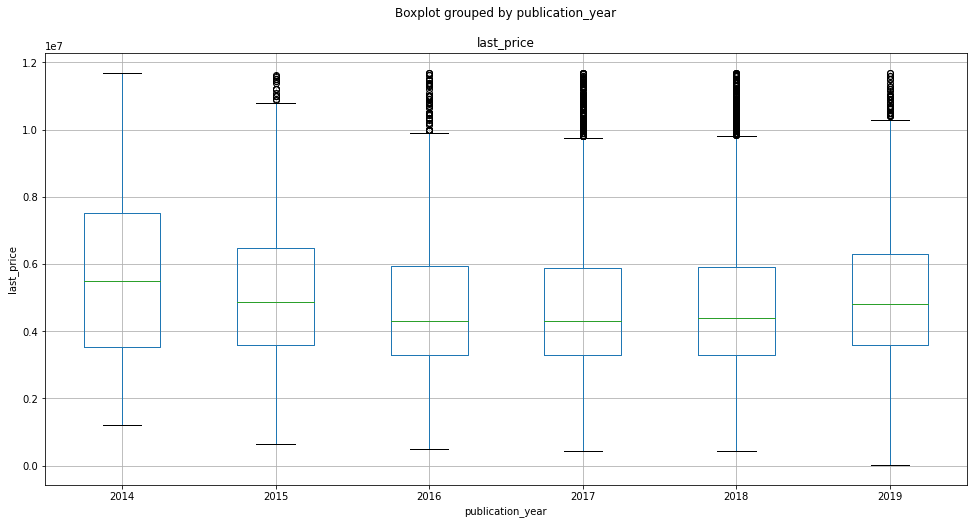

In [48]:
get_boxes_by_price(good_df, column='publication_year')

**Выводы по зависимости цены от дня недели/месяца/года:**
* Зависимостей от дня недели или месяца не выявлено;
* Можно заметить, что цена на квартиры падали с 2014 по 2016 год, а после наблюдается небольшой ежегодный прирост цен.

#### 5. Выборка по 10 населённым пунктам с наибольшим числом объявлений

Описание выборки:
1. 10 населённых пунктов с наибольшим числом объявлений. 
2. Подсчёт средней цены квадратного метра в этих населённых пунктах. 
3. Выбрать среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [49]:
df.columns

Index(['total_images', 'last_price', 'total_area_m2', 'publication_date_time',
       'rooms', 'ceiling_height_m', 'total_floors', 'living_area_m2', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area_m2',
       'balcony', 'town_name', 'dist_to_nearest_airport_km',
       'dist_to_city_center_km', 'parks_within_3km', 'dist_to_nearest_park_km',
       'ponds_within_3km', 'dist_to_nearest_pond_km',
       'publication_days_duration', 'price_per_m2', 'publication_day_of_week',
       'publication_month', 'publication_year', 'floor_group', 'kitchen_ratio',
       'living_ratio'],
      dtype='object')

In [50]:
# Выборка 10 по числу объявлений
(df.groupby('town_name') 
    .agg({'total_images':'count', 'price_per_m2':'mean', 'last_price':'mean'}) 
    .sort_values(by='total_images', ascending=False).head(10) # Выбор 10 с наиибольшим числом объявлений
    .sort_values(by='last_price', ascending=False) # Сортировка по стоимости жилья
)

,total_images,price_per_m2,last_price
town_name,,,
санкт-петербург,15259,114278.661100,8.018527e+06
пушкин,364,102969.700817,6.468061e+06
поселок парголово,321,89969.269306,4.488506e+06
деревня кудрово,273,91908.005971,4.324594e+06
поселок шушары,432,78304.712321,4.124252e+06
колпино,333,75378.911679,3.962854e+06
всеволожск,380,68562.467880,3.808567e+06
поселок мурино,518,84983.371048,3.717107e+06
гатчина,300,68694.019851,3.493098e+06


#### 6. Выделение центральной зоны Санкт-Петербурга

In [51]:
filter_cols = [
    'dist_to_city_center_km',
    'last_price'
]
# Выделим значения только для Санкт-Петербурга.
df6 = df.query('town_name == "санкт-петербург"')
df6.head()

,total_images,last_price,total_area_m2,publication_date_time,rooms,ceiling_height_m,total_floors,living_area_m2,floor,is_apartment,...,ponds_within_3km,dist_to_nearest_pond_km,publication_days_duration,price_per_m2,publication_day_of_week,publication_month,publication_year,floor_group,kitchen_ratio,living_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,...,2.0,1.0,NaN,120370.3704,Thursday,3,2019,другой,0.2315,0.4722
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.30,4,False,...,2.0,1.0,558.0,92785.7143,Thursday,8,2015,другой,0.1482,0.6125
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,99.45,9,False,...,3.0,0.0,424.0,408176.1006,Friday,7,2015,другой,0.1258,0.6255
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,...,1.0,0.0,121.0,100000.0000,Tuesday,6,2018,другой,0.4100,0.3200
7,5,7915000.0,71.6,2019-04-18,2,NaN,24.0,42.10,22,False,...,0.0,NaN,NaN,110544.6927,Thursday,4,2019,другой,0.2640,0.5880


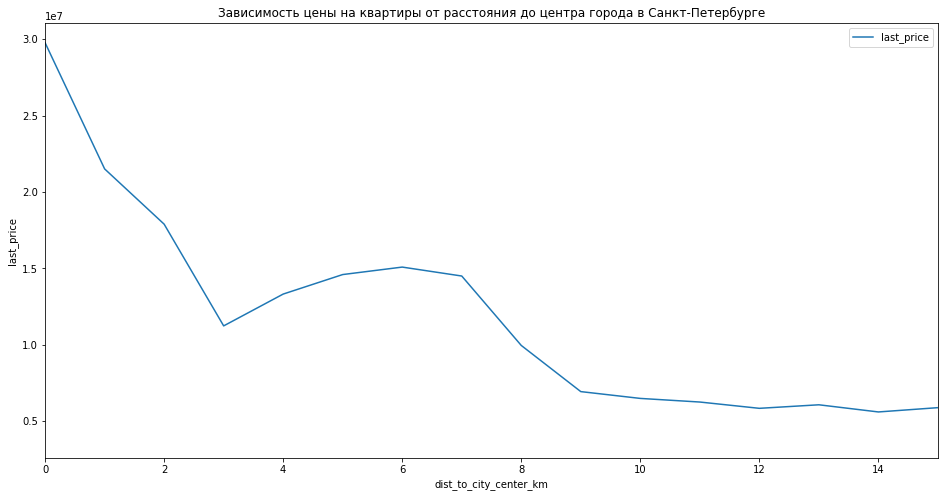

In [52]:
# Построение зависимости для определение границы центра города
(df6.groupby('dist_to_city_center_km')
    .agg({'last_price':'mean'})
    .plot(
        figsize = (16, 8), 
        title='Зависимость цены на квартиры от расстояния до центра города в Санкт-Петербурге',
        xlim = (0, 15)
    )
    .set_ylabel('last_price')
);

**Выводы по нахождению центральной зоны Санкт-Петербурга:**
* Судя по зависимости и скачку в росте цен на квартиры, центр города оценивается с 9 километров и ближе.

#### 7. Изучение центральной зоны Санкт-Петербурга

* Изучение центральной зоны Санкт-Петербурга: площадь, цена, число комнат, высота потолков. 
* Выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
* Отличаются ли они от общих выводов по всему городу?

In [53]:
df7_center =  df.query('town_name == "санкт-петербург" & dist_to_city_center_km <= 9')
df7_out_center = df.query('town_name == "санкт-петербург" & dist_to_city_center_km > 9')

In [54]:
filter_cols = [
    'total_area_m2',
    'last_price',
    'rooms',
    'ceiling_height_m'    
]

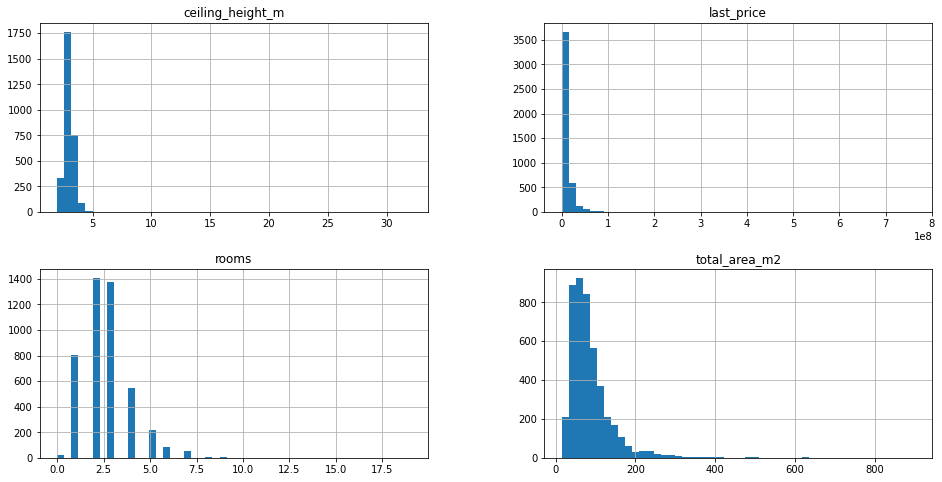

In [55]:
# Центральная зона
df7_center[filter_cols].hist(figsize=(16, 8), bins=50); 

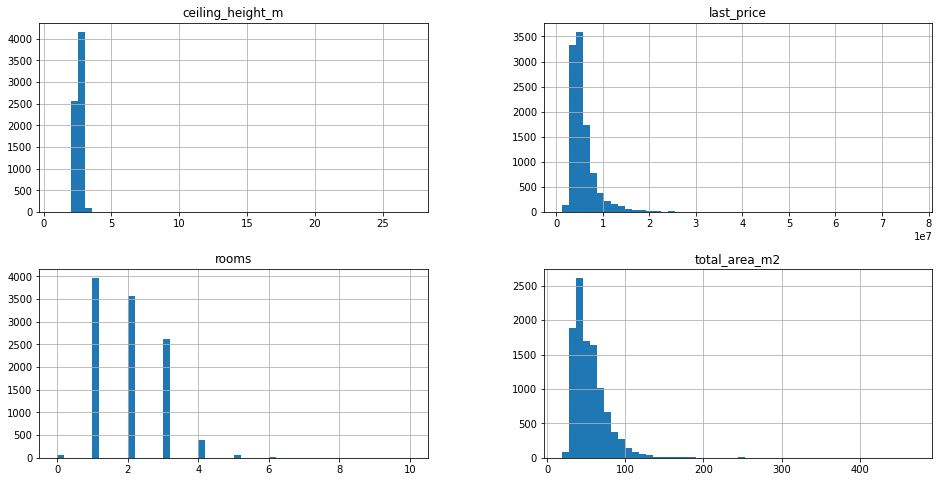

In [56]:
# Внецентральная зона
df7_out_center[filter_cols].hist(figsize=(16, 8), bins=50);

In [57]:
s1 = df7_center.agg(
    {
        'ceiling_height_m' : 'median',
        'last_price' : 'mean',
        'rooms' : 'mean',
        'total_area_m2' : 'mean'
    }
)
s2 = df7_out_center.agg(
    {
        'ceiling_height_m' : 'median',
        'last_price' : 'mean',
        'rooms' : 'mean',
        'total_area_m2' : 'mean'
    }
)

In [58]:
total = pd.DataFrame(index=['Center', 'Out_center'], data=[s1, s2])
total

,ceiling_height_m,last_price,rooms,total_area_m2
Center,3.0,1.321031e+07,2.677341,86.567831
Out_center,2.6,5.772397e+06,1.958864,55.325841


**Выводы по основным характеристикам:**
* В центральной зоне чаще встречаются квартиры с более высокими потолками, но это скорее редкость;
* Аналогичная ситуация и для числа комнат;
* Цены на квартиры на порядок выше в центральной зоне;
* Также как с ценами, большой разрыв наблюдается в площадях квартир;

Выводы весьма ожидаемые. Подтверждают результат выделения центральной зоны.

In [59]:
filter_cols = [
    'total_area_m2',
    'last_price',
    'rooms',
    'floor_group',
    'dist_to_city_center_km'
]

In [60]:
corr = df7_center[filter_cols].corr()
corr.style.background_gradient(cmap='coolwarm', axis=1) \
    .set_properties(**{'max-width': '100px', 'font-size': '9pt'})

,total_area_m2,last_price,rooms,dist_to_city_center_km
total_area_m2,1,0.642746,0.753544,-0.214425
last_price,0.642746,1,0.347157,-0.124176
rooms,0.753544,0.347157,1,-0.254526
dist_to_city_center_km,-0.214425,-0.124176,-0.254526,1


In [61]:
corr = df7_out_center[filter_cols].corr()
corr.style.background_gradient(cmap='coolwarm', axis=1) \
    .set_properties(**{'max-width': '100px', 'font-size': '9pt'})

,total_area_m2,last_price,rooms,dist_to_city_center_km
total_area_m2,1,0.830331,0.752182,-0.0138723
last_price,0.830331,1,0.518021,-0.109003
rooms,0.752182,0.518021,1,-0.0427268
dist_to_city_center_km,-0.0138723,-0.109003,-0.0427268,1


**Выводы по запрошенным факторам ценообразования:**
* Центральная зона:
    * Наибольшее влияние имеет площадь квартиры;
    * Количество комнат далеко на втором месте;
    * Находясь уже в центральной зоне, +/- пара километров от центра роли не играет.
* Внецентральная зона:
    * Здесь же площадь квартиры начинает усиленно доминировать среди других факторов;
    * Подобно ему и возросло влияние количетсво комнат;
    * Расстояние же до центра остаётся в неуделе на фоне старших товарищей)
    
____
____

<a id='section5'></a>
### 5. Выводы исследования

1. **Скорость продажи квартир**:
    * Медианным значением для продажи квартир является 3 месяца (85 дней);
    * Можно считать, что квартира продаётся быстро, если продана быстрее 1,5 месяцев (41 день);
    * Можно считать, что квартира плохо продаётся, если продана дольше чем за 6 месяцев (183 день);
2. **Влияние на стоимость квартиры**:
    * Цена за квадратный метр
    * Площадь квартиры
    * Размер жилой и кухонной зоны
    * Количество комнат
3. **Зависимость от времени**:
    * Зависимостей от дня недели или месяца не выявлено;
    * Можно заметить, что цена на квартиры падали с 2014 по 2016 год, а после наблюдается небольшой ежегодный прирост цен.
4. **Оценка стоимости квартир по населённым пунктам**:
    * *Топ 10 самых дорогих*:
        * Санкт-Петербург
        * Пушкин
        * поселок Парголово
        * деревня Кудрово
        * поселок Шушары
        * Колпино	
        * Всеволожск
        * поселок Мурино
        * Гатчина
        * Выборг	
5. **Определение и анализ центральной зоны Санкт-Петербурга**:
    * Квартира в центральной зоне города не более чем в 9 километрах от центра.
    * В центральной зоне чаще встречаются квартиры с более высокими потолками и чуть большим количетством комнат;
    * Цены сильно выше в центральной зоне и площади квартир заметно больше;
6. **Различия между центральной и внецентральной зонами Санкт-Петербурга**:
    * *Центральная зона*:
        * Наибольшее влияние имеет площадь квартиры;
        * Количество комнат далеко на втором месте;
        * Находясь уже в центральной зоне, +/- пара километров от центра роли не играет.
    * *Внецентральная зона*:
        * Здесь же площадь квартиры начинает усиленно доминировать среди других факторов;
        * Подобно ему и возросло влияние количетсво комнат;
        * Расстояние же до центра остаётся в неуделе на фоне старших товарищей)